### All the techniques of handling ,issing values

1. Mean/ Median/Mode replacement
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. End of Distribution imputation
5. Arbitrary imputation
6. Frequent categories imputation

# Random Sample Imputation

Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

When should it be used? It assumes that the data are missing completely at random(MCAR)


In [2]:
df=pd.read_csv('titanic_train.csv',usecols=['age','sex','fare'])

<IPython.core.display.Javascript object>

In [3]:
df.head()

,sex,age,fare
0,female,NaN,7.7333
1,male,38.0,8.6625
2,female,30.0,24.1500
3,female,54.0,23.0000
4,male,40.0,13.0000


In [4]:
df['age'].isnull().sum()

174

In [5]:
df['age'].sample() # THIS WILL TAKE A RANDOM SAMPLE FROM AGE

773    17.0
Name: age, dtype: float64

In [6]:
df['age'].dropna().sample() #TAKES SAMPLE FROM AFTER DROPPING NA VALUES

557    30.0
Name: age, dtype: float64

In [7]:
# WE NEED TO REPLACE 174 NA VALUES WITH RANDOM FROM NOT NA SO,
random=df['age'].dropna().sample(df['age'].isnull().sum()) # WE GET 174 RANDOM VALUES

NOW WE NEED TO REPLACE THEM

In [8]:
def impute(variable):
    df[variable+'_random']=df[variable].fillna(random)

In [9]:
impute('age')

In [10]:
df  # we CANNOT USE RANDOM SET I.E RANDOM WITH DF['AGE'] BECAUSE THEIR INDEX SHOULD BE MATCH so,

,sex,age,fare,age_random
0,female,NaN,7.7333,NaN
1,male,38.0,8.6625,38.0
2,female,30.0,24.1500,30.0
3,female,54.0,23.0000,54.0
4,male,40.0,13.0000,40.0
...,...,...,...,...
845,male,55.0,50.0000,55.0
846,male,58.0,29.7000,58.0
847,female,24.0,26.0000,24.0
848,female,3.0,13.7750,3.0


In [11]:
df=pd.read_csv('titanic_train.csv', usecols=['age','fare','survived'])
df.head()

<IPython.core.display.Javascript object>

,age,fare,survived
0,NaN,7.7333,1
1,38.0,8.6625,0
2,30.0,24.1500,0
3,54.0,23.0000,1
4,40.0,13.0000,0


In [12]:
 def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [13]:
 median=df.age.median()

In [14]:
impute_nan(df,"age",median)

In [99]:
df.head()

,age,fare,survived,age_median,age_random
0,NaN,7.7333,1,28.0,27.0
1,38.0,8.6625,0,38.0,38.0
2,30.0,24.1500,0,30.0,30.0
3,54.0,23.0000,1,54.0,54.0
4,40.0,13.0000,0,40.0,40.0


In [100]:
import matplotlib.pyplot as plt


<AxesSubplot:>

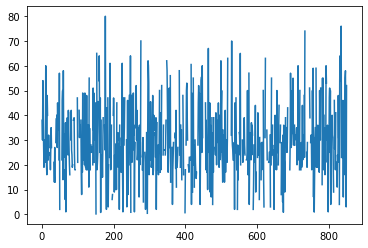

In [101]:
df['age'].plot()

<AxesSubplot:ylabel='age'>

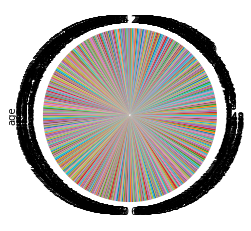

In [102]:
df['age'].plot(kind='pie')

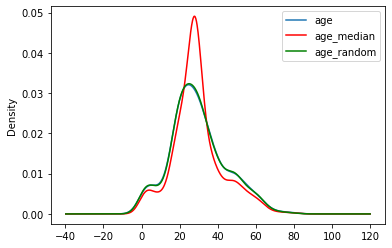

In [113]:
fig = plt.figure()
ax = fig.add_subplot(111)
df.age.plot(kind='kde', ax=ax)
df.age_median.plot(kind='kde', ax=ax, color='red')
df.age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

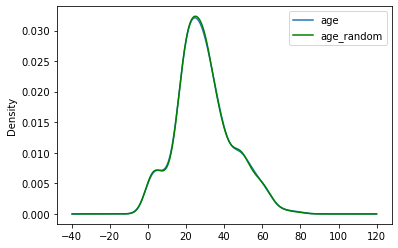

In [126]:
 
df.age.plot(kind='kde',label='age')
df.age_random.plot(kind='kde',color='green',)
plt.legend()

#ABOVE THERE IS NO DIFFERENCE IN DISTRUBUTION SO THERE IS NO DIFF IN VARIENCE
SO, WE ACHEIVED THE DRaAWBACK WITH MEDIAN


Advantages

    Easy To implement
    There is less distortion in variance

Disadvantage

    Every situation randomness won't work



In [140]:
df.head(10)

,age,fare,age_NAN
0,28.0,7.7333,1
1,38.0,8.6625,0
2,30.0,24.1500,0
3,54.0,23.0000,0
4,40.0,13.0000,0
5,28.0,22.5250,0
6,19.0,0.0000,0
7,30.0,13.0000,0
8,22.0,7.7750,0
9,21.0,9.8250,0


THIS METHOD SHOWS TO MACHINE WHERE AGE_NAN IS 1 there is some modification done


Advantages

    Easy to implement
    Captures the importance of missing values

Disadvantages

    Creating Additional Features(Curse of Dimensionality)

